In [45]:
# Import and configuration
import chart_config
from functools import reduce
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from config import *

In [104]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path)
incident_data.fillna("Unknown", inplace=True)
incident_data.count()
incident_data.head()

,Year,State Name,Number of Killed,Number of Injured,Incident Info,Latitude,Longitude,Participant Age,Participant Age Group,participant_gender,Participant Relationship,Participant Status,Participant Type,State Abbr
0,2013,Pennsylvania,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,PA
1,2013,California,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.909,-118.333,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,CA
2,2013,Ohio,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,OH
3,2013,Colorado,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.802,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,CO
4,2013,North Carolina,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.114,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NC


In [47]:
# Your code for demography-related analysis starts here
new_data = {
    'Age Group': [],
    'Type': [],
    'Status': [],
    'Year': [],
    'State Name': []
}
for i,row in incident_data.head().iterrows():
    age_groups = shared.split_value(row['Participant Age Group'])
    types = shared.split_value(row['Participant Type'])
    statuses = shared.split_value(row['Participant Status'])
    for participant_index in age_groups:
        age_group = age_groups[participant_index]
        status = statuses[participant_index]
        part_type = types[participant_index]
        new_data['Age Group'].append(age_group)
        new_data['Type'].append(part_type)
        new_data['Status'].append(status)
        new_data['Year'].append(row['Year'])
        new_data['State Name'].append(row['State Name'])
        
new_data = pd.DataFrame(new_data)
new_data

,Age Group,Type,Status,Year,State Name
0,Adult 18+,Victim,Arrested,2013,Pennsylvania
1,Adult 18+,Victim,Injured,2013,Pennsylvania
2,Adult 18+,Victim,Injured,2013,Pennsylvania
3,Adult 18+,Victim,Injured,2013,Pennsylvania
4,Adult 18+,Subject-Suspect,Injured,2013,Pennsylvania
5,Adult 18+,Victim,Killed,2013,California
6,Adult 18+,Victim,Injured,2013,California
7,Adult 18+,Victim,Injured,2013,California
8,Adult 18+,Victim,Injured,2013,California
9,Adult 18+,Subject-Suspect,"Injured, Unharmed, Arrested",2013,Ohio


In [93]:
# Your code for demography-related analysis starts here
new_data = {
    'Age Group': [],
    'Type': [],
    'Year': [],
    'State Name': []
}
for i,row in incident_data.iterrows():
    age_groups = shared.split_value(row['Participant Age Group'])
    types = shared.split_value(row['Participant Type'])
    for participant_index in age_groups:
        age_group = age_groups[participant_index]
        part_type = types[participant_index]
        new_data['Age Group'].append(age_group)
        new_data['Type'].append(part_type)
        new_data['Year'].append(row['Year'])
        new_data['State Name'].append(row['State Name'])
    
new_data = pd.DataFrame(new_data)

In [152]:
suspect_age_groups = new_data.loc[new_data["Type"] == "Subject-Suspect"]
adult_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Adult 18+"]
adult_suspect_count = adult_suspect_age_groups['State Name'].value_counts()
teen_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Teen 12-17"]
teen_suspect_count = teen_suspect_age_groups['State Name'].value_counts()
child_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Child 0-11"]
child_suspect_count = child_suspect_age_groups['State Name'].value_counts()

suspect_df = pd.DataFrame({"Adult 18+ Shooters":adult_suspect_count,
                "Teen 12-17 Shooters":teen_suspect_count,
                  "Child 0-11 Shooters":child_suspect_count})

suspect_df.fillna(0, inplace=True)
suspect_df['Child 0-11 Shooters'] = suspect_df['Child 0-11 Shooters'].astype(int)
suspect_df = suspect_df.reset_index()

suspect_df = suspect_df.rename(columns={'index':'State'}).sort_values('Adult 18+ Shooters').reset_index(drop = True)
suspect_df.head()

,State,Adult 18+ Shooters,Teen 12-17 Shooters,Child 0-11 Shooters
0,Wyoming,176,4,1
1,Hawaii,263,7,0
2,Vermont,377,12,1
3,South Dakota,383,46,1
4,North Dakota,418,12,2


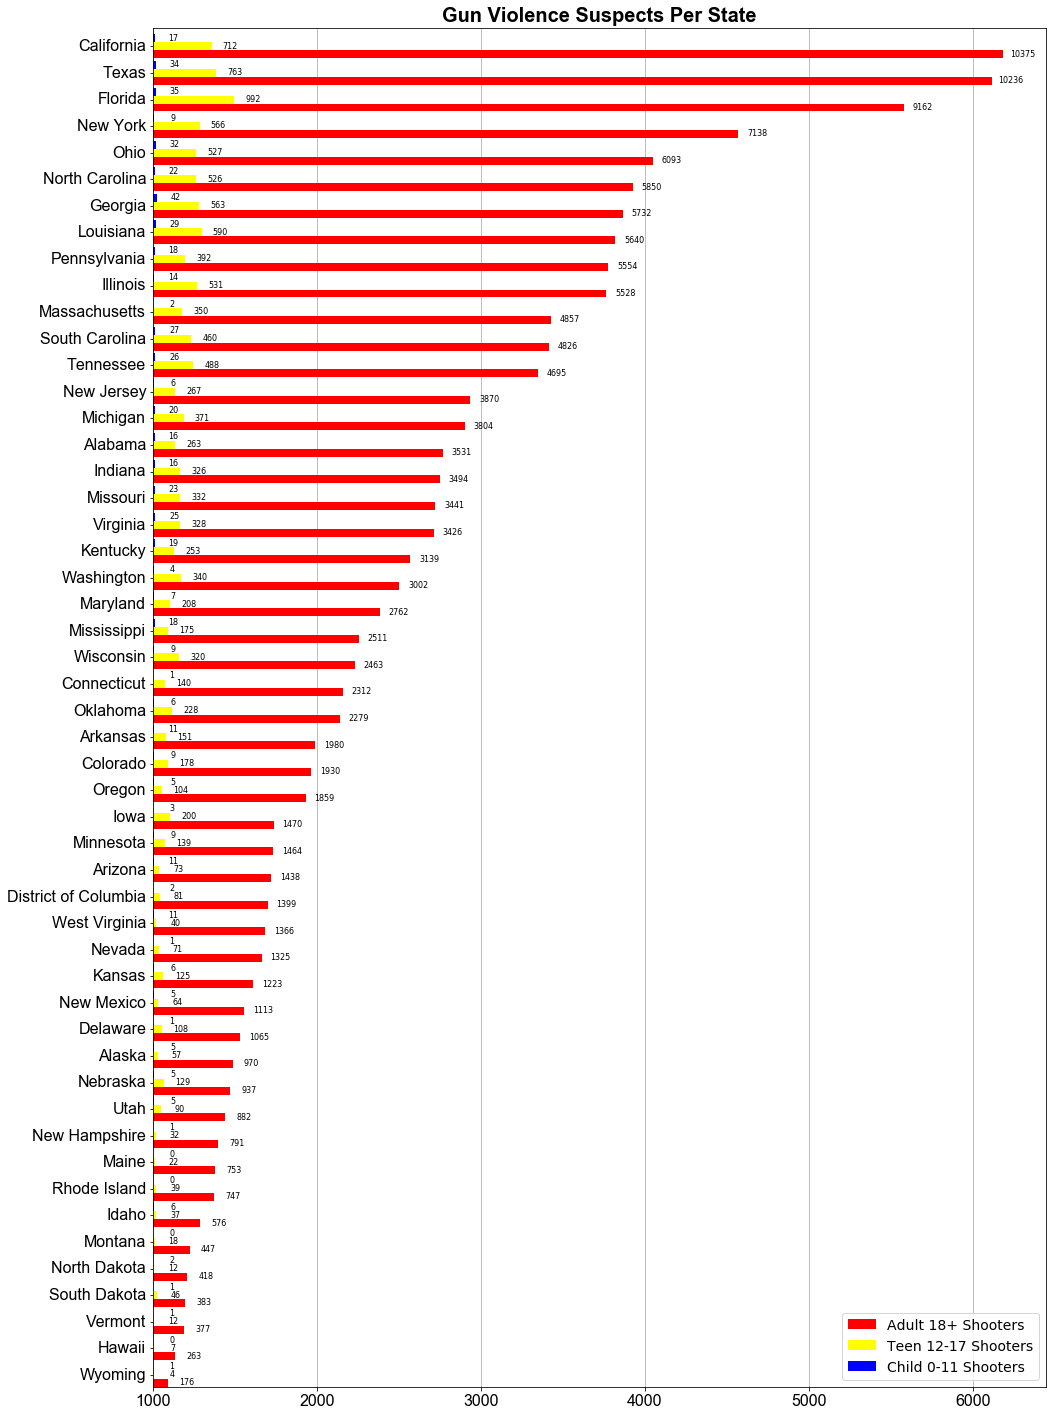

In [149]:
fig,ax = plt.subplots(figsize=(16,25))
bar_width = 0.3
num_adult = ax.barh(suspect_df.index, suspect_df['Adult 18+ Shooters'], bar_width, color='red')
num_teen = ax.barh(suspect_df.index + bar_width, suspect_df['Teen 12-17 Shooters'], bar_width, color='yellow')
num_child = ax.barh(suspect_df.index + bar_width * 2, suspect_df['Child 0-11 Shooters'], bar_width, color='blue')
ax.set_title('Gun Violence Suspects Per State', fontdict=chart_config.title_font)
ax.set_yticks(suspect_df.index + bar_width)
ax.set_yticklabels(suspect_df['State'],fontdict=chart_config.axis_font, wrap=True, ma='left',va='center')
ax.set_xticklabels([1000 * i for i in range(1,12)], fontdict=chart_config.axis_font)
ax.set_ylim(-0.15, 51)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([num_adult, num_teen, num_child],['Adult 18+ Shooters', 'Teen 12-17 Shooters', 'Child 0-11 Shooters'], fontsize=14)

title_font = {'fontname':'Arial', 'size':20, 'color':'black', 'weight':'semibold' }              
axis_font = {'fontname':'Arial', 'size':16}
legend_font = {'size' : 15 }
ticks_fontsize = 14
marker_size = 14
fig_size = (16, 10)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(width + 230, rect.get_y() ,
                '%d' % int(width),
                ha='center', va='bottom', fontsize=8)

autolabel(num_adult)
autolabel(num_teen)
autolabel(num_child)

In [123]:
vic_age_groups = new_data.loc[new_data["Type"] == "Victim"]
adult_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Adult 18+"]
adult_vic_count = adult_vic_age_groups['State Name'].value_counts()
teen_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Teen 12-17"]
teen_vic_count = teen_vic_age_groups['State Name'].value_counts()
child_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Child 0-11"]
child_vic_count = child_vic_age_groups['State Name'].value_counts()

vic_df = pd.DataFrame({"Adult 18+ Victims":adult_vic_count,
                "Teen 12-17 Victims":teen_vic_count,
                  "Child 0-11 Victims":child_vic_count})

vic_df.fillna(0, inplace=True)
vic_df['Child 0-11 Victims'] = vic_df['Child 0-11 Victims'].astype(int)
vic_df = vic_df.reset_index()

vic_df = vic_df.rename(columns={'index':'State'}).sort_values('Adult 18+ Victims').reset_index(drop = True)
vic_df.head()

,State,Adult 18+ Victims,Teen 12-17 Victims,Child 0-11 Victims
0,Wyoming,87,1,5
1,South Dakota,128,17,9
2,Hawaii,142,15,2
3,North Dakota,155,10,6
4,Vermont,181,4,5


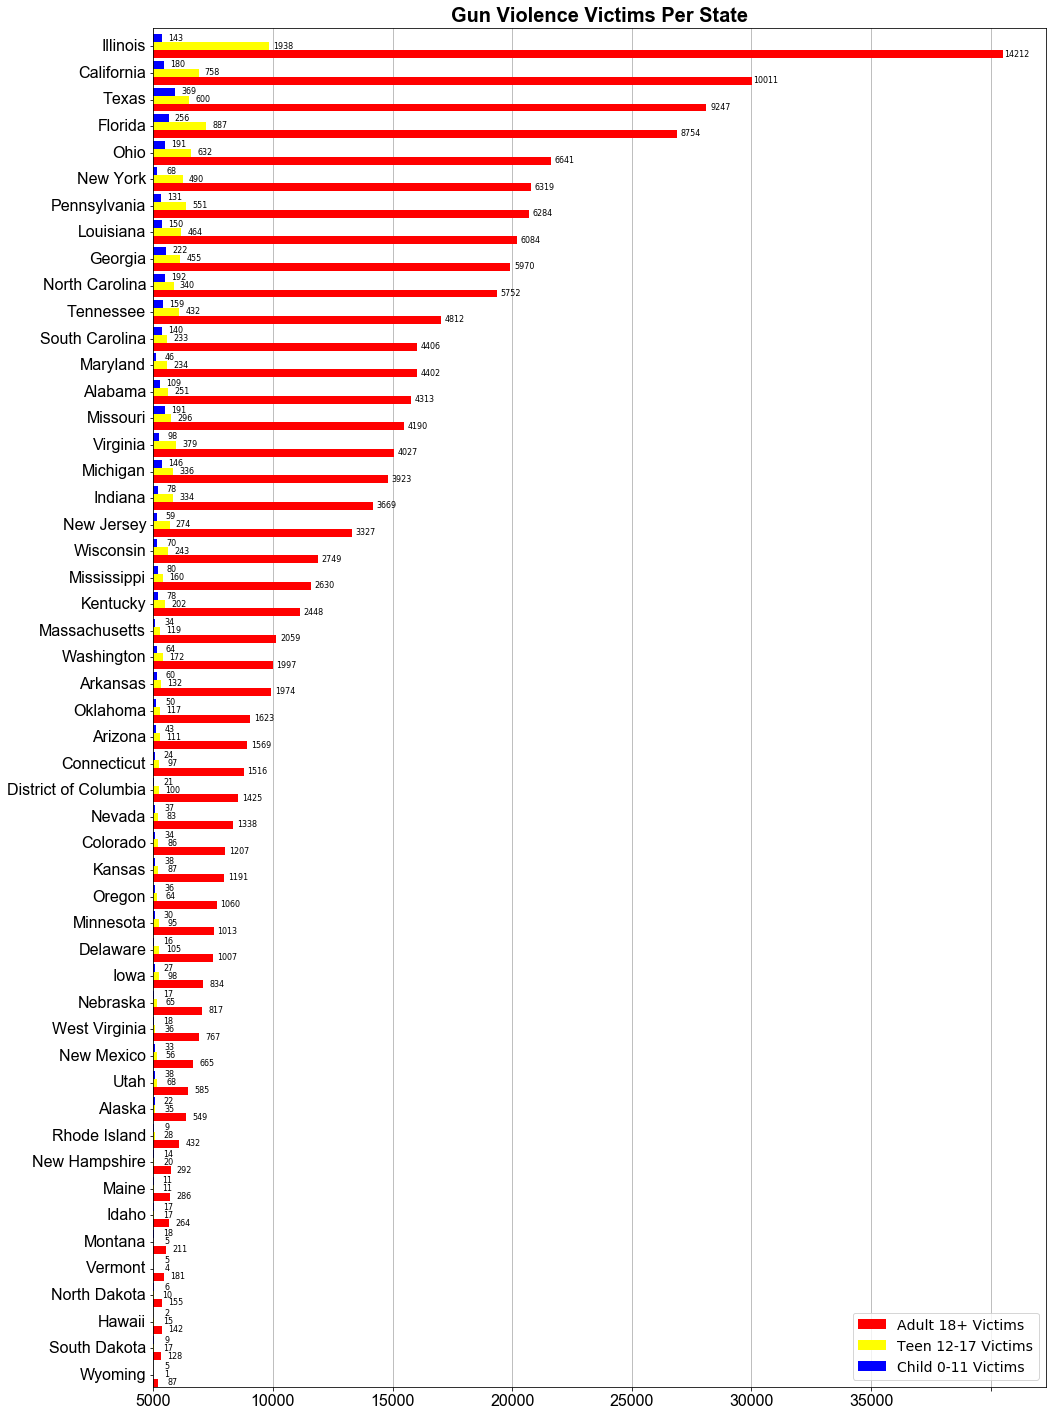

In [151]:
fig,ax = plt.subplots(figsize=(16,25))
bar_width = 0.3
num_adult = ax.barh(vic_df.index, vic_df['Adult 18+ Victims'], bar_width, color='red')
num_teen = ax.barh(vic_df.index + bar_width, vic_df['Teen 12-17 Victims'], bar_width, color='yellow')
num_child = ax.barh(vic_df.index + bar_width * 2, vic_df['Child 0-11 Victims'], bar_width, color='blue')
ax.set_title('Gun Violence Victims Per State', fontdict=chart_config.title_font)
ax.set_yticks(vic_df.index + bar_width)
ax.set_yticklabels(vic_df['State'],fontdict=chart_config.axis_font, wrap=True, ma='left',va='center')
ax.set_xticklabels([5000 * i for i in range(1,8)], fontdict=chart_config.axis_font)
ax.set_ylim(-0.15, 51)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([num_adult, num_teen, num_child],['Adult 18+ Victims', 'Teen 12-17 Victims', 'Child 0-11 Victims'], fontsize=14)

title_font = {'fontname':'Arial', 'size':20, 'color':'black', 'weight':'semibold' }              
axis_font = {'fontname':'Arial', 'size':16}
legend_font = {'size' : 15 }
ticks_fontsize = 14
marker_size = 14
fig_size = (16, 10)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(width + 230, rect.get_y() ,
                '%d' % int(width),
                ha='center', va='bottom', fontsize=8)

autolabel(num_adult)
autolabel(num_teen)
autolabel(num_child)